In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [4]:
data=digits.data

In [5]:
np.size(data)

115008

In [7]:
data_std=StandardScaler().fit_transform(data)

In [8]:
data_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [9]:
cov_mat=np.cov(data_std.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [10]:
#3
abs_min = abs(cov_mat).min()
print(abs_min)
negative_max = cov_mat.min()
print(negative_max)

0.0
-0.57051363323811


In [11]:
eigval,eigvec = np.linalg.eig(cov_mat)

In [12]:
eigval

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [13]:
total = sum(eigval)
explained_variance = [(i/total)*100 for i in eigval]

In [14]:
a=explained_variance

In [15]:
#4
a1=pd.DataFrame(a)
a1.count()

0    64
dtype: int64

In [16]:
cumsum = np.cumsum(explained_variance)
a=pd.DataFrame(cumsum)
a.value_counts()

100.000000    4
90.738337     1
92.033038     1
92.624422     1
93.195585     1
             ..
86.077023     1
86.940036     1
87.776679     1
88.574372     1
90.046426     1
Length: 61, dtype: int64

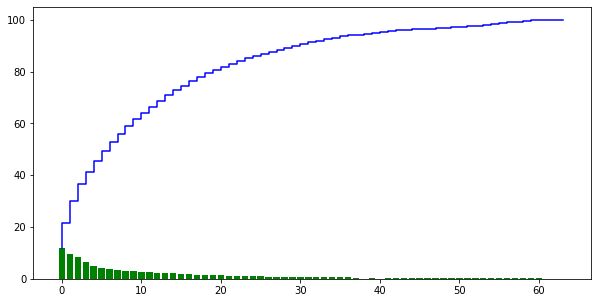

In [17]:
plt.figure(figsize=(10,5))
plt.bar(range(len(explained_variance)),explained_variance,color='g')
plt.step(range(len(cumsum)),cumsum,color='b')

In [ ]:
#Question 8

In [18]:
pca = PCA(n_components=20)

In [19]:
data_new = pca.fit_transform(data_std)

In [20]:
data_new.shape

(1797, 20)

In [21]:
cov_mat1= np.cov(data_new.T)
eigval1,eigvec1 = np.linalg.eig(cov_mat1)

In [22]:
total1 = sum(eigval1)
explained_variance1 = [(i/total1)*100 for i in eigval1]

In [23]:
explained_variance1 # Answer - Depends on the number of components in pca

[15.173420917149969,
 12.055419169028426,
 10.647461753579487,
 8.19376481608969,
 6.128111099090796,
 5.3135331080182,
 4.9705236370562735,
 4.273628484445234,
 3.7804168343160764,
 3.6969077417292775,
 3.507506087937385,
 3.249342019173081,
 1.8762251820682883,
 2.012325223783753,
 2.064116126530242,
 2.23725723040328,
 2.4133006362493927,
 2.729872631630841,
 2.8080017251736478,
 2.868865576546637]

In [ ]:
#9

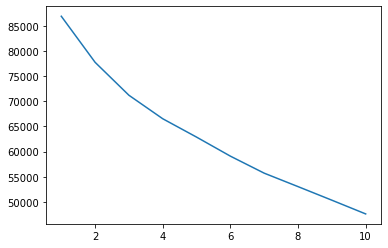

In [24]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)

plt.plot(np.arange(1,11),wcss)
    

In [ ]:
# q 10

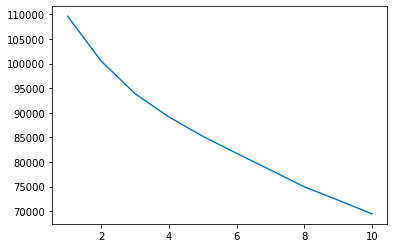

In [25]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

plt.plot(np.arange(1,11),wcss)

In [ ]:
#Question 11

In [26]:
y=digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [27]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(data_std,y,test_size=0.2,random_state=40)

In [28]:
dt1 = DecisionTreeClassifier()

In [29]:
dt1.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [30]:
y_pred1 =dt1.predict(x_test1)

In [31]:
miscount1 = 0
for i in range(len(y_pred1)):
    if y_pred1[i]!=y_test1[i]:
        miscount1+=1
miscount1

71

In [ ]:
#Question 12

In [32]:
counting=0
for i in range(len(y_pred1)):
    if y_pred1[i]==8:
        counting+=1
counting

28

In [ ]:
#Question 13

In [33]:
miscount = 0
for i in range(len(y_pred1)):
    if y_pred1[i]!=y_test1[i]:
        miscount+=1
miscount

71

In [ ]:
# Results can vary, it depends on the model training